<a href="https://colab.research.google.com/github/adilimam12/Classification-capstone-project-3/blob/main/Coronavirus_tweet_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coronavirus Tweet Sentiment Analysis
Classification model

---



Team curio-monks

Adil imam

Md sazil sharif

Asadullah pathan

Sushil kumar singh

# **Problem description**

This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

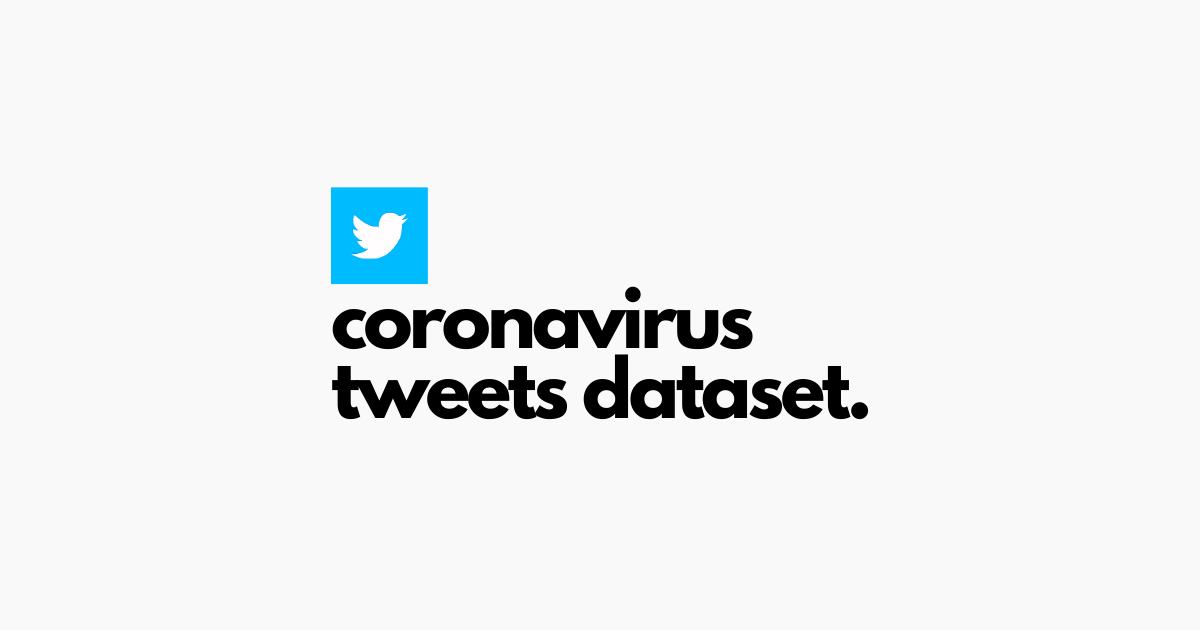

**Information Given :**

*Location = location (country) from where tweet is posted

*Tweet At = Date on which tweet is posted

*Original Tweet = Blog of tweet

*Label = Type of sentiments ('Neutral', 'Positive', 'Extremely Negative', 'Negative','Extremely Positive')

**Project Work flow**

Steps followed:

1)Data Preparation

2)EDA

3)Feature engineering

4)Data cleaning

5)Model buliding

6)Evaluation of models

# Data preparation

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string 
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from nltk.stem.snowball import SnowballStemmer
from wordcloud import wordcloud

import warnings
warnings.filterwarnings('ignore')


**Loading the data**

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
covid_data=pd.read_csv("/content/drive/MyDrive/almabetter/capstone project 3/Coronavirus Tweets.csv",encoding='latin1')

**Some insights of the data**

---



In [4]:
covid_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


**This Dataset contains features like **

---
Username-encoded for privacy concerns

Screen name-encoded for privacy concerns

Location-Location of the person tweeting

TweetAt-time and date of the tweet

Orignal tweet-What people where tweeting in twitter

Sentiment-sentiment of the tweet 



**Exploring the data frame**

In [5]:
#shape of the data
covid_data.shape

(41157, 6)

No of rows-41157

No of columns-6

**let's look for all the features present in our dataset **

---







In [6]:
#checking all the columns
covid_data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [7]:
#datatype of the column
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


There are two numericsl column which is not required in our model building.
Here we are dealing with onlhy two columns Sentiment and Orignal tweet

In [8]:
#checking the statistical details of all features
covid_data.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


In [9]:
#looking for duplicates
covid_data.duplicated().sum()

0

No duplicates found

**let's check null values **

---



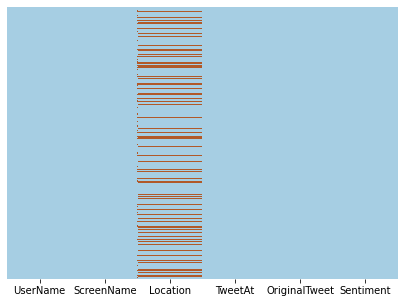

In [10]:
# check for Null values
plt.rcParams['figure.figsize'] = (7, 5)
sns.heatmap(covid_data.isnull(), cbar=False,yticklabels=False,cmap='Paired')


# **EDA**

---

*Location analysis*

In [11]:
# Check for NAN count
covid_data.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

As we are not using location we will not treat NAN values we are using orignal tweet for our final prediction.

In [26]:
#count of the location
top_location=covid_data['Location'].value_counts().head(10)
top_location


London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

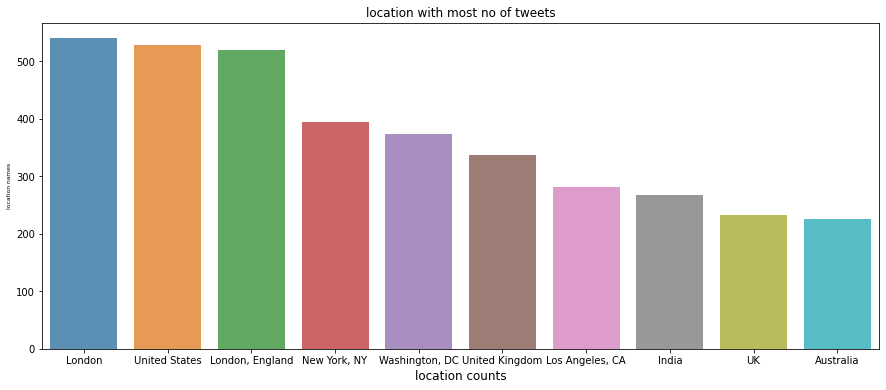

In [27]:
#plotting count of the location
plt.figure(figsize=(15,6))
sns.barplot(top_location.index, top_location.values, alpha=0.8)
plt.title('location with most no of tweets')
plt.ylabel('location names', fontsize=6)
plt.xlabel('location counts', fontsize=12)
plt.show()

As we can seefrom above visualisation most number of tweets are coming from london

---



***Sentiment analysis***

In [29]:
# count of Sentiments
sentiment_count=covid_data['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


In [51]:
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
covid_data.replace(replace_values,inplace=True)

In [52]:
sentiment_count1 = covid_data['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


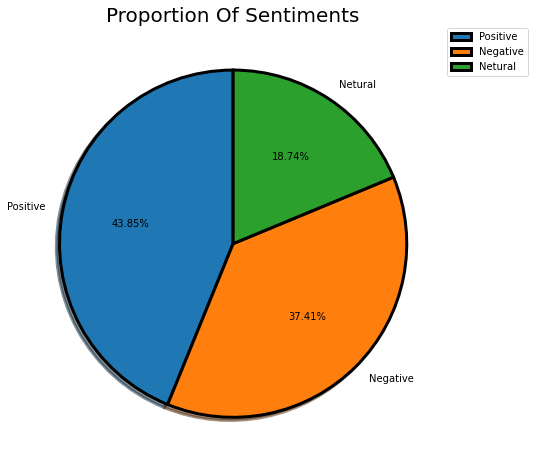

In [67]:
#visualising proportion sentiments
# Plotting the piechart for Sentiments distribution
sentiment_count1 = covid_data['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(7,8))
plt.pie(x=sentiment_count1,labels=labels,autopct="%.2f%%",radius=1.1, shadow = True, startangle = 90,wedgeprops= {"edgecolor":"black",
                     'linewidth': 3,
                     'antialiased': True})
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.axis('equal')
plt.show()

From the above Pie chart we can see that  around 44% people are tweeting positive and 37% are tweeting negative will rest of the people who are tweeting have a neutral opinion.

*Tweet date analysis*

---

